# Introduction


For this project, a CSV file was provided with data relating to various countries' categorical outcomes. These categories represent various aspects of a country's performance and outlooks. Given the vast amount of data, it is required for this project to explore the given data and provide an analysis with respects to the categories. Using tools and methodologies available in Python, an analysis and interpretation of the data can be made, allowing for correlations and conclusions to be drawn from the respective categories while also being able to determine relationships among said categories.

# Data processing:

The code below is used to import modules that are necessary to use for our data calculations, analysis, and processing.

In [1]:
import pandas as pd
import numpy as np
from statistics import mean
import statistics
from matplotlib import pyplot as plt

The code below is used to read the data from the provided CSV file and to also convert the data from a CSV file into a dataset.

In [2]:
dataset1 = pd.read_csv('../data/data.csv')

The code below is used to give the reader a visual of how the data looks for the first 10 rows after reading the CSV file.

In [3]:
dataset1.head(10)

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140.0,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820.0,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310.0,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2
5,Antigua and Barbuda,Americas,89,25.96,12.35,2.12,75,9.9,196.41,99.0,17900.0,91.1,84.5
6,Argentina,Americas,41087,24.42,14.97,2.20,76,14.2,134.92,97.8,17130.0,NaN,NaN
7,Armenia,Europe,2969,20.34,14.06,1.74,71,16.4,103.57,99.6,6100.0,NaN,NaN
8,Australia,Western Pacific,23050,18.95,19.46,1.89,82,4.9,108.34,NaN,38110.0,96.9,97.5
9,Austria,Europe,8464,14.51,23.52,1.44,81,4.0,154.78,NaN,42050.0,NaN,NaN


The code below is used to give the reader a visual of the number of entries for the respective categories in the dataset and their type.

In [4]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        194 non-null    object 
 1   Region                         194 non-null    object 
 2   Population                     194 non-null    int64  
 3   Under15                        194 non-null    float64
 4   Over60                         194 non-null    float64
 5   FertilityRate                  183 non-null    float64
 6   LifeExpectancy                 194 non-null    int64  
 7   ChildMortality                 194 non-null    float64
 8   CellularSubscribers            184 non-null    float64
 9   LiteracyRate                   103 non-null    float64
 10  GNI                            162 non-null    float64
 11  PrimarySchoolEnrollmentMale    101 non-null    float64
 12  PrimarySchoolEnrollmentFemale  101 non-null    flo

The code below will print out all the sections/categories in the CSV file. This will assist in determining which parts of our dataset requires data cleaning. The sections which require data cleaning would be those that indicate that they have cells with null/zero values.

In [5]:
print(dataset1.isnull().sum())

Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                    11
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers              10
LiteracyRate                     91
GNI                              32
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64


The code below is used to return a description of the data in the dataframe.

In [6]:
dataset1.describe()

,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
count,1.940000e+02,194.000000,194.000000,183.000000,194.000000,194.000000,184.000000,103.000000,162.000000,101.000000,101.000000
mean,3.635997e+04,28.732423,11.163660,2.940656,70.010309,36.148969,93.641522,83.710680,13320.925926,90.850495,89.632673
std,1.379031e+05,10.534573,7.149331,1.480984,9.259075,37.992935,41.400447,17.530645,15192.988650,11.017147,12.817614
min,1.000000e+00,13.120000,0.810000,1.260000,47.000000,2.200000,2.570000,31.100000,340.000000,37.200000,32.500000
25%,1.695750e+03,18.717500,5.200000,1.835000,64.000000,8.425000,63.567500,71.600000,2335.000000,87.700000,87.300000
50%,7.790000e+03,28.650000,8.530000,2.400000,72.500000,18.600000,97.745000,91.800000,7870.000000,94.700000,95.100000
75%,2.453525e+04,37.752500,16.687500,3.905000,76.000000,55.975000,120.805000,97.850000,17557.500000,98.100000,97.900000
max,1.390000e+06,49.990000,31.920000,7.580000,83.000000,181.600000,196.410000,99.800000,86440.000000,100.000000,100.000000


The functions below are used to clean the data for a region that is passed to the function. The data is cleaned by using the median value to replace the NaN entries in the columns/categories according to the median values of the respective regions of the NaN entires. This means that the NaN entries of the dataset will be filled with the median value of the region for which that NaN entry belongs to. 

In [7]:
def region_data_per_category(region_as_string, category_as_string):
    
    dataset_grouping_median = dataset1.groupby('Region').get_group(region_as_string)[category_as_string].agg(np.median)
    dataset1.loc[(dataset1.Region == region_as_string) & (dataset1[category_as_string].isnull()), category_as_string] = dataset_grouping_median

The function below is called per region to clean the data for the fertility rate column.

In [8]:
regions = ['Eastern Mediterranean', 'Europe', 'Africa', 'Americas', 'Western Pacific', 'South-East Asia']

for region in regions:
    region_data_per_category(region, 'FertilityRate')

The function below is called per region to clean the data for the literacy rate column.

In [9]:
for region in regions:
    region_data_per_category(region, 'LiteracyRate')

The function below is called per region to clean the data for the GNI column.

In [10]:
for region in regions:
    region_data_per_category(region, 'GNI')

There are missing values in the data set. These are from 6 categories. The categories are: • Fertility Rate • Cellular Subscribers • Literacy Rate • GNI • Primary School Enrolments percentages for both genders.

For the given data set, the median value of the respective categories/columns was used to fill in the null/zero values. The null/zero values were filled with the median value of the region they belonged to. This is because the data is skewed and not symmetric and hence using the median imputation method would be best to fill in the null/zero values of the data set for the respective columns/categories. Moreover, there are vast differences between the global category/column median value and the median values of the respective categories/columns per region. Hence each null/zero value is filled with its region's median value instead of a global median value for the column/category, as using the global median value would further skew the analysis and output of the respective regions.

It should be said that the Primary School Enrolments percentages for both genders have too many missing values and it would best to consider excluding it from the analysis rather than using the median value method to fill in the missing values.
Using the median value to replace the null/zero values will however limit how much correlation can be drawn between variables when trying to find a relationship between said variables. This can cause ambiguity in drawing conclusions and relationships between variables however, the dataset is large enough to make reasonable conclusions.

Furthermore, upon viewing and inspecting the data, when determining the median, sometimes the null/zero values are included in determining the median value. Hence it is important to exclude the null/zero values from the total value count of the respective columns/categories to avoid having an incorrect value for the median. Besides the missing values from the data set and how they could affect the median values of the respective columns/categories, it can be said that there are no other issues with the data set.



# Exploratory data analysis

The code below is used to determine the country with the highest percentage of their population under the age of 15.

In [11]:
col_index = dataset1.Under15.idxmax()
row_details = dataset1.loc[col_index]
country_highest_population_under15 = pd.DataFrame(data=row_details)

print('The country with the highest population under the age of 15 is:')
country_highest_population_under15.transpose()

The country with the highest population under the age of 15 is:


,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
123,Niger,Africa,17157,49.99,4.26,7.58,56,113.5,29.52,70.6,720.0,64.2,52.0


The code below is used to determine the country with the lowest percentage of their population under the age of 15.

In [12]:
col_min = dataset1.Under15.idxmin()
row_details_min = dataset1.loc[col_min]
country_lowest_population_under15 = pd.DataFrame(data=row_details_min)

print('The country with the lowest population under the age of 15 is:')
country_lowest_population_under15.transpose()

The country with the lowest population under the age of 15 is:


,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
85,Japan,Western Pacific,127000,13.12,31.92,1.39,83,3.0,104.95,94.3,35330.0,NaN,NaN


The code below is used to determine the mean percentage of the population that is over the age of 60 years old of the respective regions in the dataset. 

In [13]:
def region_mean_data_per_category(region_as_string, category_as_string):
    
    dataset_grouping_mean = dataset1.groupby('Region').get_group(region_as_string)[category_as_string].agg(np.mean)
    
    if category_as_string == "LifeExpectancy":
        return round(dataset_grouping_mean)
    
    else:
        return round(dataset_grouping_mean, 2)


data_list = []

for region in regions:
    region_data = region_mean_data_per_category(region, "Over60")
    data_list.append(region_data)

print('The table below shows the mean percentage of the population over the age of 60 for the respective regions:')

table_variables = {'Region':regions, "Mean percentage (%)": data_list}

data_table = pd.DataFrame(data=table_variables)
data_table.sort_values("Mean percentage (%)")

The table below shows the mean percentage of the population over the age of 60 for the respective regions:


,Region,Mean percentage (%)
2,Africa,5.22
0,Eastern Mediterranean,5.62
5,South-East Asia,8.77
4,Western Pacific,10.16
3,Americas,10.94
1,Europe,19.77


The region that has the highest percentage of their population being over 60 years old is Europe.

The code below is used to determine the mean percentage of the literacy rates of the respective regions in the dataset. 

In [14]:
data_list = []

for region in regions:
    region_data = region_mean_data_per_category(region, "LiteracyRate")
    data_list.append(region_data)

print('The table below shows the mean literacy rates of the respective regions:')

table_variables = {'Region':regions, "Mean literacy rate(%)": data_list}

data_table = pd.DataFrame(data=table_variables)

data_table.sort_values("Mean literacy rate(%)")

The table below shows the mean literacy rates of the respective regions:


,Region,Mean literacy rate(%)
5,South-East Asia,65.52
2,Africa,69.42
0,Eastern Mediterranean,83.87
4,Western Pacific,92.91
3,Americas,93.19
1,Europe,98.99


The region with the lowest literacy rate is South-East Asia.

The code below is used to determine the mean child mortality rates of the respective regions in the dataset. 

In [15]:
data_list = []

for region in regions:
    region_data = region_mean_data_per_category(region, "ChildMortality")
    data_list.append(region_data)

print('The table below shows the mean of the child mortality rates for the respective regions:')

table_variables = {'Region':regions, "Mean child mortality rate": data_list}

data_table = pd.DataFrame(data=table_variables)

data_table.sort_values("Mean child mortality rate")

The table below shows the mean of the child mortality rates for the respective regions:


,Region,Mean child mortality rate
1,Europe,10.05
3,Americas,19.32
4,Western Pacific,24.71
5,South-East Asia,35.05
0,Eastern Mediterranean,40.25
2,Africa,84.04


The region with the lowest child mortality rates is Europe.

The code below is used to determine the mean life expectancy of the respective regions in the dataset.

In [16]:
data_list = []

for region in regions:
    region_data = region_mean_data_per_category(region, "LifeExpectancy")
    data_list.append(region_data)

print('The table below shows the mean life expectancy of the respective regions:')

table_variables = {'Region':regions, "Mean life expectancy": data_list}

data_table = pd.DataFrame(data=table_variables)

data_table.sort_values("Mean life expectancy")

The table below shows the mean life expectancy of the respective regions:


,Region,Mean life expectancy
2,Africa,58
5,South-East Asia,69
0,Eastern Mediterranean,70
4,Western Pacific,72
3,Americas,74
1,Europe,77


The code below is used to set a value for the size of the graphs being plotted, the font size and font weight.

In [17]:
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['font.size'] = 20

The code below is used to plot the box-and-whisker diagrams that represent the child mortality rates of the respective regions in the dataset. 

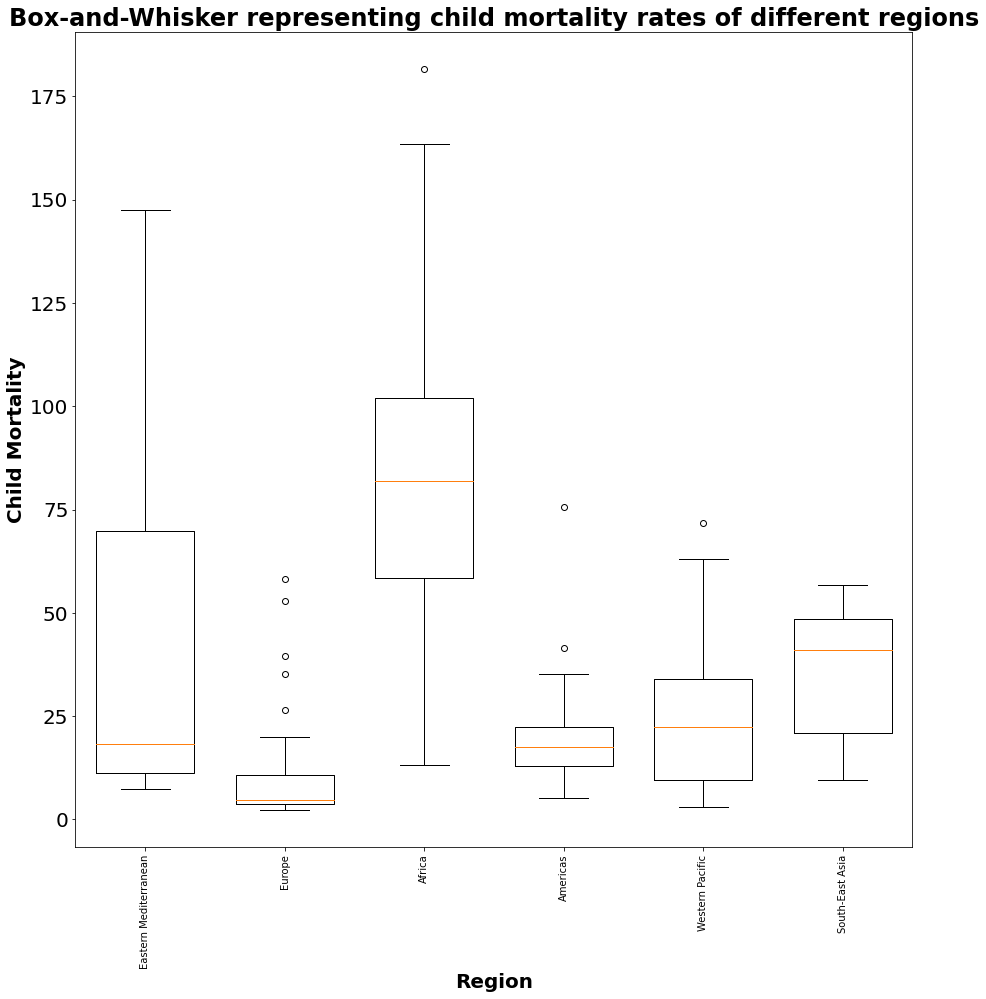

In [18]:
def region_data_as_list(region_as_string, category_as_string):
    
    dataset_grouping = dataset1.groupby('Region').get_group(region_as_string)[category_as_string]

    return list(dataset_grouping)


box_data = []

for region in regions:
    region_mortality = region_data_as_list(region, 'ChildMortality')
    box_data.append(region_mortality)

plt.boxplot(box_data, widths = 0.7)
plt.title("Box-and-Whisker representing child mortality rates of different regions", fontweight='bold')
plt.xlabel("Region")
plt.ylabel("Child Mortality")
plt.xticks([1, 2, 3, 4, 5, 6], regions, fontsize=10, rotation='vertical')

plt.show()

The lower the overall child mortality rate, the smaller the median of will be. The whiskers also identify the numbers that are outside of the average data points. The box-and-whisker chart displays the data's shape, variability and one can leverage the chart to determine the skewness of data points. There are also regions that contain outliers, which are suspected to be anomalies or perhaps because data collection errors. An outlier is a value that lies in both extremes of the data. The value lies outside the overall distribution pattern and thus can affect the overall data series. These anomalies are treated as abnormal values that can distort the final insights. Values are said to be outliers if they are equal to 1.5*(Interquartile range).

The charts of the regions all represent a variation in the data for the respective regions. With regions with a lower child mortality rate, the plot's whiskers tend to be less 'stretched' out than regions with higher child mortality rates. This can be observed with the region of Eastern Mediterranean and Africa where the child mortality rates have a larger variety as compared to other regions, hence the plots are more skewed and greatly present in the graph above. With regions showing lower child mortality rates, there are low child mortality rates across the region's respective countries, hence the plot for the respective box-and-whiskers skews less and present a smaller plot for their box-and-whiskers.

The code below is used to plot a scatter plot that compares the GNI and life expectancies of the respective regions in the dataset.  

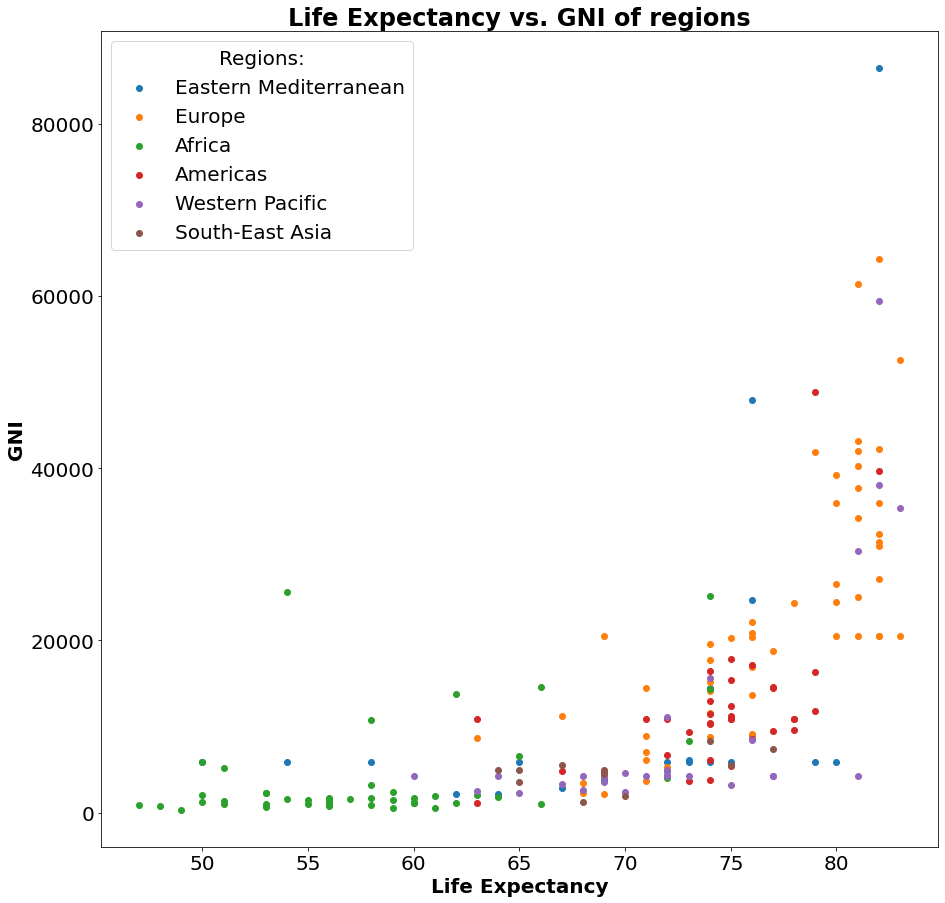

In [19]:
for region in regions:
    x = region_data_as_list(region, "LifeExpectancy")
    y = region_data_as_list(region, "GNI")
    plt.scatter(x, y, label=region)

plt.ylabel('GNI')
plt.xlabel("Life Expectancy")

plt.title("Life Expectancy vs. GNI of regions", fontweight='bold')
plt.legend(title='Regions:')

plt.show()

From the graph above, there is a correlation between life expectancy and wealth/income. The higher the life expectancy of a region, the higher the income of the region is. If there is an increase in the life expectancy of the region, there is an increase in the region's income and vice versa. For some regions, there will be instances where there will be a shared value for the GNI. This is because of the median value imputation. Because the median value was used to impute the zero/null values, it will provide insights that are relatively close to the expected correlation and relationship that is being investigated but it will limit how we can make definitive correlations and conclusions between the life expectancy and GNI. However, given that the dataset has a large pool of countries that make up the data, a reliable conclusion can still be made from the graph in regard to the relationship between the two categories.

In this instance, it must also be stated that there is no direct correlation or causation between life expectancy and wealth/income. It could be that there are various other factors that contribute to these two categories' correlation. However, it can be speculated that when a region has a higher income, the life expectancy also increases because the population has a chance to attain better resources that prolong their health and life. Hence it can be that indeed there are other factors that contribute to the correlation but it does not invalidate the speculation made. 

The code below is used to plot a scatter plot that compares the GNI and fertility rates of the respective regions in the dataset.  

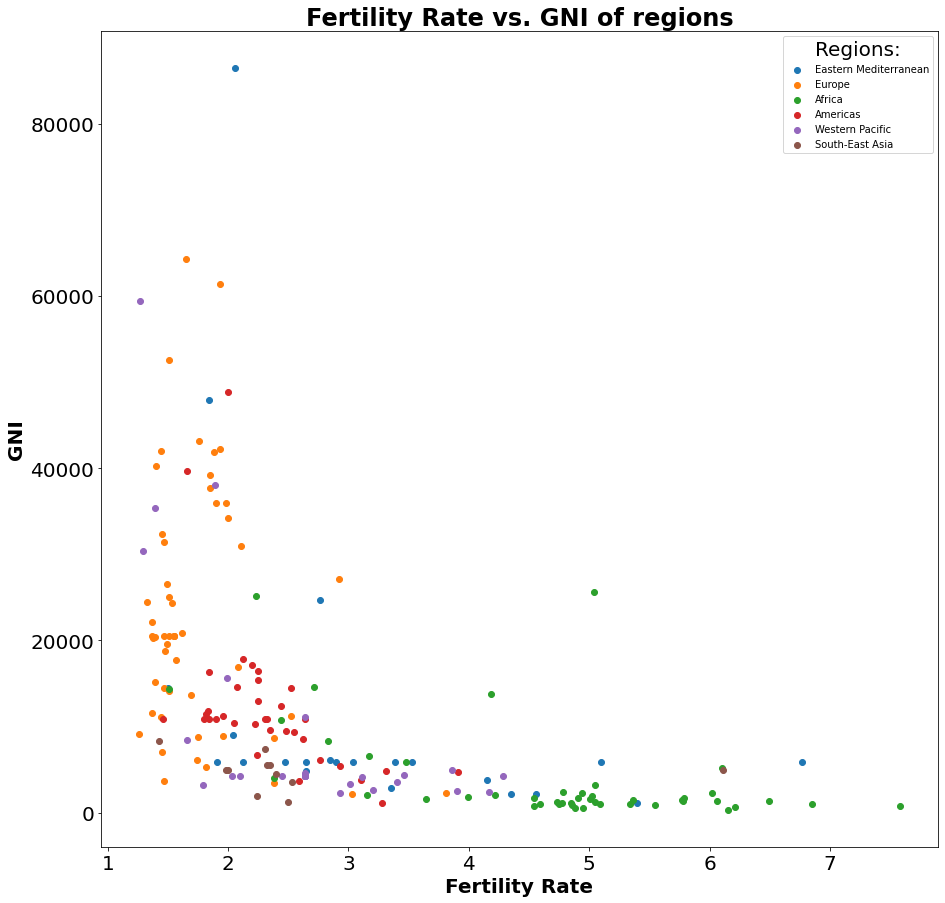

In [20]:
for region in regions:
    x = region_data_as_list(region, "FertilityRate")
    y = region_data_as_list(region, "GNI")
    plt.scatter(x, y, label=region)
    
plt.ylabel('GNI')
plt.xlabel("Fertility Rate")

plt.title("Fertility Rate vs. GNI of regions", fontweight='bold')
plt.legend(fontsize=10, title='Regions:')

plt.show()

Yes, the fertility rate decreases as income increases. There is a correlation between income/wealth and the fertility rates of the respective regions. The only countries that are an exception to this are the countries where the median value was used where the income value was null/missing. As stated in the data analysis, using the median value imputation will provide insights that are relatively close to the expected correlation and relationship that is being investigated but it will limit how we can make definitive correlations and conclusions.

In this instance, it must also be stated that there is no direct correlation or causation between fertility rates and wealth/income. It could be that there are various other factors that contribute to these two categories' correlation. However, it can be speculated that when a region has a higher income, the fertility rate decreases because the population have more resources and access to family planning and reproductive services. Hence it can be that indeed there are other factors that contribute to the correlation but it does not invalidate the speculation made. 

The code below is used to plot the box-and-whisker diagrams that represent the mean life expectancy of the respective regions in the dataset. 

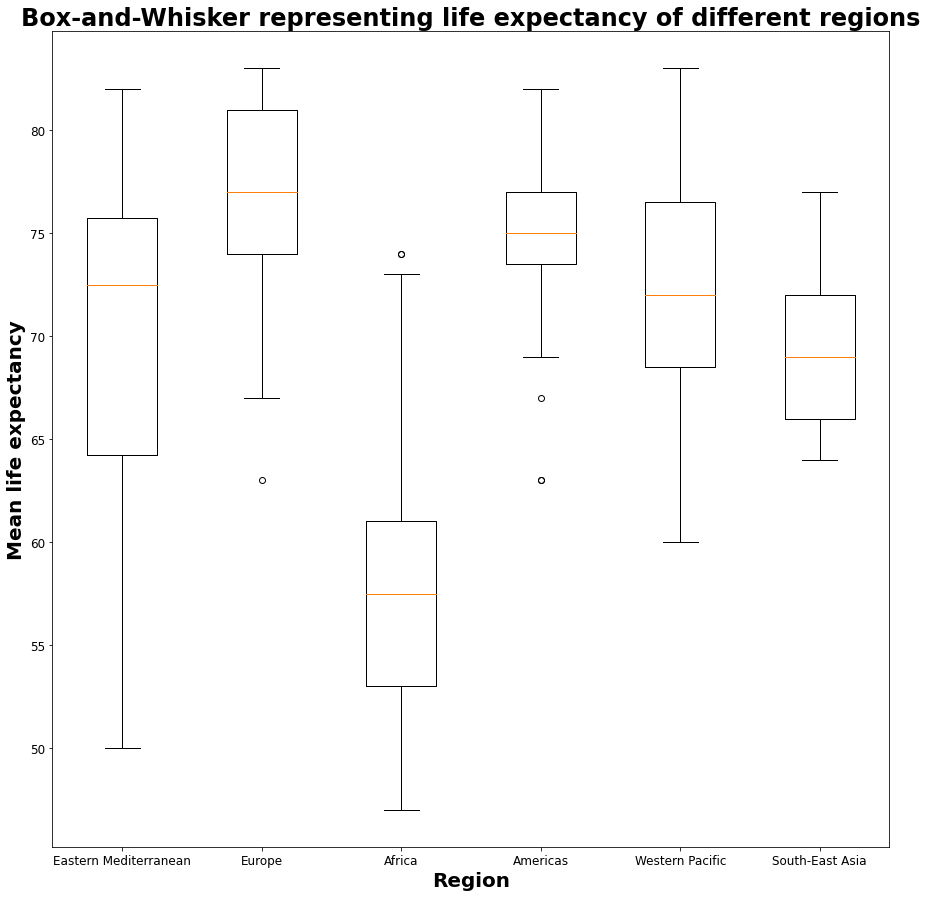

In [21]:
box_data = []

for region in regions:
    region_data = region_data_as_list(region, 'LifeExpectancy')
    box_data.append(region_data)
    
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.boxplot(box_data)
plt.title("Box-and-Whisker representing life expectancy of different regions", fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Mean life expectancy')
plt.xticks([1, 2, 3, 4, 5, 6], regions)

plt.show()

The lower the overall life expectancy, the smaller the median of will be. The whiskers also identify the numbers that are outside of the average data points. The box-and-whisker chart displays the data's shape, variability and one can leverage the chart to determine the skewness of data points. There are also regions that contain outliers, which are suspected to be anomalies or perhaps because data collection errors. An outlier is a value that lies in both extremes of the data. The value lies outside the overall distribution pattern and thus can affect the overall data series. These anomalies are treated as abnormal values that can distort the final insights. Values are said to be outliers if they are equal to 1.5*(Interquartile range).

The box-and-whisker of the regions all represent a variation in the data for the respective regions. With regions with a lower life expectancy, the plot's whiskers tend to 'stretch' out to lower age ranges than regions with higher life expectancies. This can be observed with the region of Eastern Mediterranean and Africa where the life expectancies have a larger variety but a lower mean life expectancy for the regions as compared to other regions, hence the plots are more skewed and greatly present in the graph above. With regions showing a higher life expectancy, there is less variety in the life expectancies of their respective countries, hence the plot for the respective box-and-whiskers skews less and present a higher mean life expectancy from the dataset which results in a smaller plot for their box-and-whiskers.

The higher the mean life expectancy of a region, the higher up will the box-and-whisker of said region be on the plot. There are also correlations between the other categories of the data set in relation to the respective regions’ life expectancies which will be further discussed in the conclusion in more detail. However, the most immediate correlation that can be seen is that the richer a region is, the higher the mean life expectancy of said region is.
Overall, the plots and skewness of the box-and-whisker all depends on how much variety there is in the life expectancies of each region's countries. The more variety there is, the lower the mean life expectancy of the country, the greater the skewness and plot of the box-and-whisker and vice versa.

The more wealth there is, the higher the life expectancy is in those region’s countries. Furthermore, the more wealth there is in a region, the lower the fertility is in those region’s countries. These relationships do indeed hold for Africa as the opposite is true: there is less wealth in African countries while there is a lower life expectancy in the region’s countries. Moreover, the fertility rate is one of the highest in the data set while they have some of the lowest incomes in the region.

The code below plots a scatter plot representing the literacy rates and life expectancies of the respective regions in the dataset. 

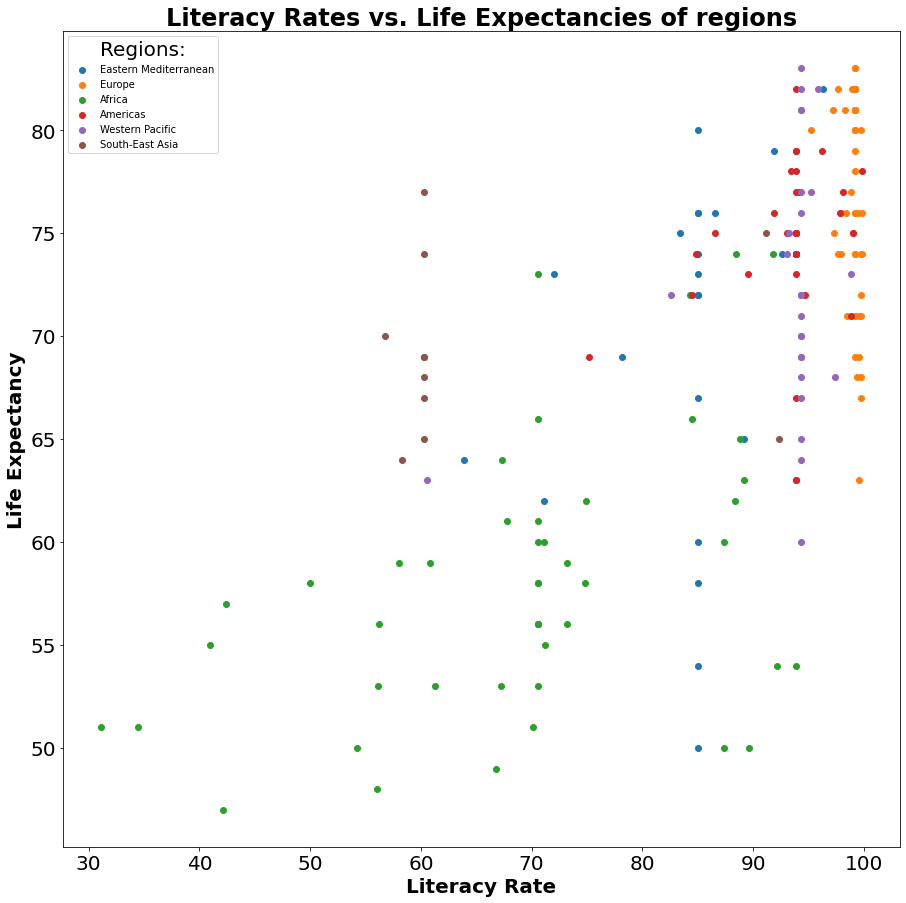

In [22]:
for region in regions:
    x = region_data_as_list(region, "LiteracyRate")
    y = region_data_as_list(region, "LifeExpectancy")
    plt.scatter(x, y, label=region)

plt.xlabel('Literacy Rate')
plt.ylabel("Life Expectancy")

plt.title("Literacy Rates vs. Life Expectancies of regions", fontweight='bold')
plt.legend(fontsize=10, title= "Regions:")

plt.show()

When observing the relationship between the literacy rate and life expectancy of the respective regions, there is a correlation between the two variables. It can be observed that there is a relationship that can be described as positively linear: as the literacy rate increases, so do the life expectancy.

It should be said that for some regions, there is not a large variety when it comes to the literacy rate, i.e.: there is a shared value for the literacy rate for certain regions. This is because in some regions, there were a lot of countries that did not have a literacy rate value and hence the median value was imputed where there was null/zero values. Using the median value imputation will provide insights that are relatively close to the expected correlation and relationship that is being investigated but it will limit how we can make definitive correlations and conclusions.

In this instance, it must also be stated that there is no direct correlation or causation between literacy rate and life expectancy. It could be that there are various other factors that contribute to these two categories' correlation. However, it can be speculated that when a region has a literacy rate, the life expectancy increases. Hence it can be that indeed there are other factors that contribute to the correlation but it does not invalidate the speculation made. 

The code below plots a scatter plot representing the literacy rates and life expectancy of the respective countries in the region of Africa.

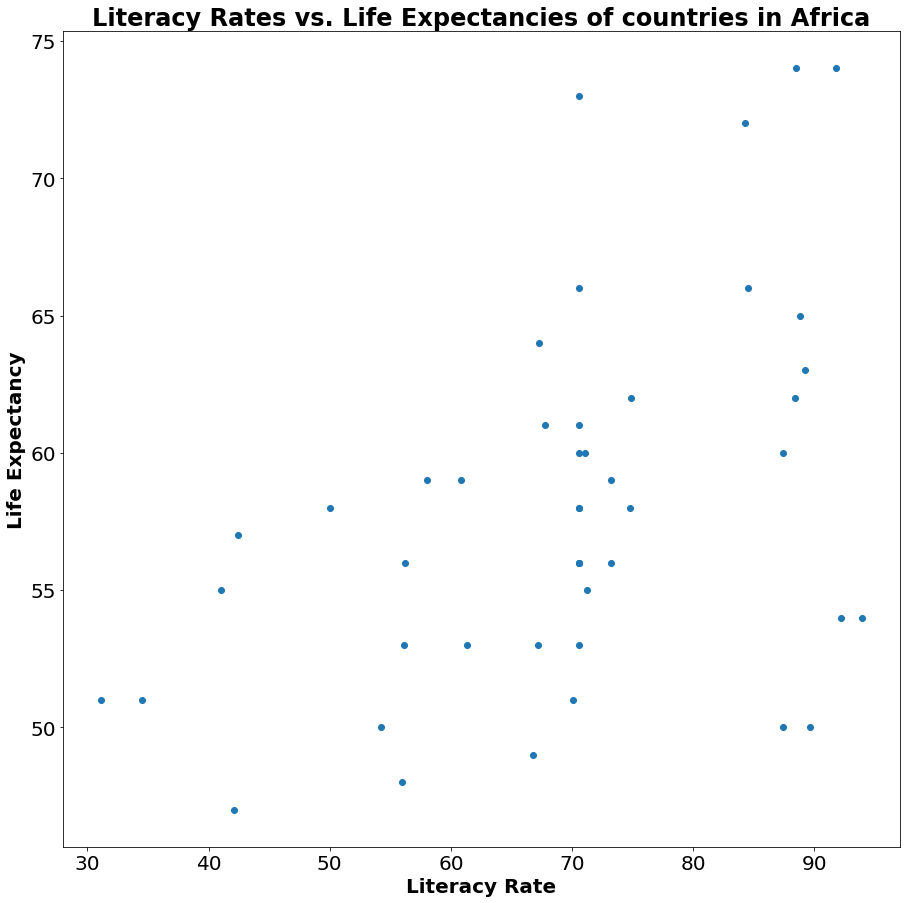

In [23]:
plt.scatter(region_data_as_list('Africa', "LiteracyRate"), region_data_as_list('Africa', "LifeExpectancy"))

plt.xlabel('Literacy Rate')
plt.ylabel("Life Expectancy")

plt.title("Literacy Rates vs. Life Expectancies of countries in Africa", fontweight='bold')

plt.show()

For Africa, there is some correlation between the life expectancy and the literacy rate: they demonstrate a linear relationship. Moreover, looking at the African region as compared to the rest of the regions in the data set, Africa ranked as one of the lowest out of all the regions in the data set regarding life expectancy and literacy rate. Although the median value was used to fill in the missing values in the data set, the correlation between literacy rate and life expectancy is present but does not present a strong and conclusive relationship, even if the median value method were to be discounted or not used. It can be said that for an increase in life expectancy, there is an increase in the literacy rate. Using the median value imputation will provide insights that are relatively close to the expected correlation and relationship that is being investigated but it will limit how we can make definitive correlations and conclusions. However, the graph above shows that the plot is moderately increasing linearly with some outliers and positive correlation between the literacy rate and life expectancy.

# Conclusion and insights

Given these observations, one can come to the simple conclusion: where there is better- and high-quality services and resources, the better the performance and outcome of a country and its citizens.

Humans require a lot of resources to be able to maintain a life that is healthy, happy, and long. In the poorer regions, there is a deficit and shortage of said resources hence leading to the regions having outcomes that are less satisfactory than their counterparts. The more wealth there is, the better educated the citizens are, the better their healthcare services are which leads to longer and higher quality lives. As such, it is important to observe that because of these correlations, we can use the information gathered in dispensing resources, money and funding for healthcare, education, and employment more efficiently so that poorer regions have a chance at having more pleasing and better outcomes in life, in their health and their education.

It must also be stated that there may not be any direct or interleaved correlations between the respective categories. It could be that there are various other factors that contribute to these categories' correlations. However, it can be speculated that when certain categories are paired together, there are correlations that exist. They may not be overt, explicit and direct but they do present a definite relationship and correlation. Hence it can be that indeed there are other factors that contribute to the correlation but it does not invalidate the speculation made. 

Overall, it is possible to use various modules, tools, and methodologies to analyse and make observations for data in Python. This allows for less tedious work and for the implementation of code to do the work required to make said analyses and observations any given data. Furthermore, the use of Python and code allows for efficiency and reduces effort in approaching data analysis.

